## Remove Greenscreen from dataset images
The dataset of [drgfreeman](https://github.com/DrGFreeman/rps-cv) has been shot on greenscreen background. This could be an issue when training the CNN and then playing on a clear background.  
In this notebook, I am using opencv to remove as best as possible the green background.  
I also rotate the picture 90 deg clockwise and paste the result in a 300x300px images, to match my two other datasets.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def remove_background_expand_image(image_path: str) -> str:

    # load and convert image from BGR to HSV
    image = cv2.imread(image_path)
    plt.imshow(image)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range of green color in HSV
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(image_hsv, lower_green, upper_green)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Smooth the mask
    kernel = np.ones((5,5),np.uint8)
    mask_smoothed = cv2.morphologyEx(mask_inv, cv2.MORPH_CLOSE, kernel)

    # Create a uniformed background
    background_color = (200, 200, 200)
    uniformed_background = np.full_like(image, background_color, dtype=np.uint8)

    # Bitwise AND of the black background and the mask
    foreground = cv2.bitwise_and(uniformed_background, uniformed_background, mask=mask)

    # Bitwise AND of the image and the mask
    background = cv2.bitwise_and(image, image, mask=mask_smoothed)

    # Combine foreground and background
    combined = cv2.add(foreground, background)

    # create new image of shape 300x300
    height, width = image.shape[:2]
    new_height = height + 100
    new_image = np.zeros((new_height, width, 3), np.uint8)
    expanded_image = np.full_like(new_image, background_color, dtype=np.uint8)

    # Calculate the position to paste the result image for centering
    paste_y = int((new_height - height) / 2)

    # Paste the result onto the expanded image (centered vertically)
    expanded_image[paste_y:paste_y+height, 0:width] = combined

    # Rotate the image 90 degrees to the left
    rotated_image = cv2.rotate(expanded_image, cv2.ROTATE_90_CLOCKWISE)

    # Save image
    new_path = image_path.replace('.png', '_.png')
    print('Saved: ', new_path)
    cv2.imwrite(new_path, rotated_image)

    return new_path


In [3]:
def display_image(path: str) -> None:
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    print(path, image.shape)

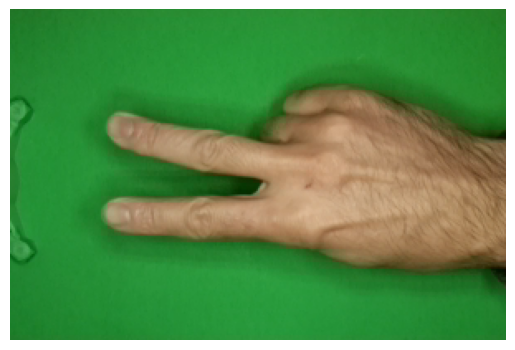

test_images/scissors_green.png (200, 300, 3)


In [4]:
source_image = 'test_images/scissors_green.png'
display_image(source_image)

Saved:  test_images/scissors_green_.png


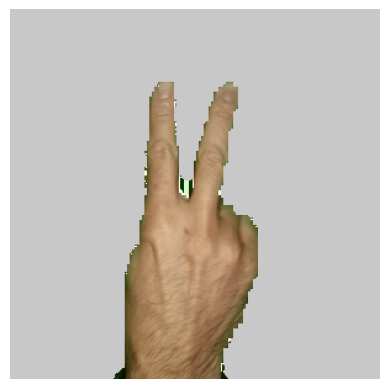

test_images/scissors_green_.png (300, 300, 3)


In [5]:
result_image = remove_background_expand_image(source_image)
display_image(result_image)

In [ ]:
# Run through all images in the dataset

folders = [
    r'dataset\drgfreeman\paper',
    r'dataset\drgfreeman\rock',
    r'dataset\drgfreeman\scissors',
]

for dir in folders:
    for img in [_ for _ in os.listdir(dir) if _.endswith('.png')]:
        remove_background_expand_image(os.path.join(dir, img))